# seaborn可视化(1) — 相关
类型	|函数|	主要参数
--|:--:|--:
散点图|	scatterplot(x,y,data)	|绘制具有多种语义分组可能性的散点图
散点图|relplot(x,y,data,kind = 'scatter')	|
线条图	|lineplot(x,y,data)	|画一条可能有几种语义分组的线
线条图|relplot(x,y,data,kind = 'line')	|图形级接口，用于在FacetGrid上绘制关系图。
多子图	|relplot(x,y,data,col,row,height,kind = 'line')|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
sns.set(font = 'SimHei')
sns.set(font_scale=1.5)
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


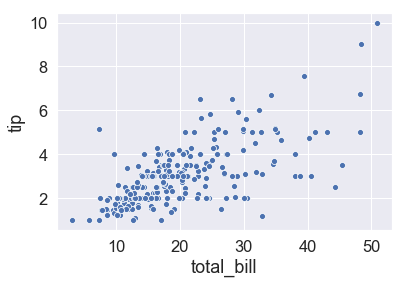

In [2]:
"""
sns.scatterplot(
    ['x=None', 'y=None', 'hue=None', 'style=None', 'size=None', 
    'data=None', 'palette=None', 'hue_order=None', 'hue_norm=None',
    'sizes=None', 'size_order=None', 'size_norm=None', 'markers=True',
    'style_order=None', 'x_bins=None', 'y_bins=None', 'units=None', 
    'estimator=None', 'ci=95', 'n_boot=1000', "alpha='auto'", 
    'x_jitter=None', 'y_jitter=None', "legend='brief'", 
    'ax=None', '**kwargs'],)
"""
#默认状态
sns.scatterplot(x = 'total_bill',y = 'tip',data = tips)

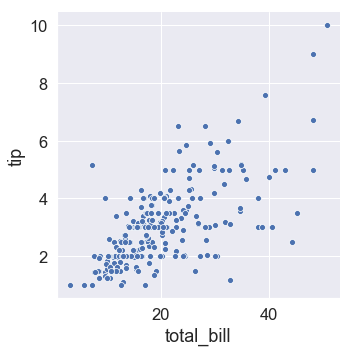

In [3]:
sns.relplot(x="total_bill", y="tip", data=tips)

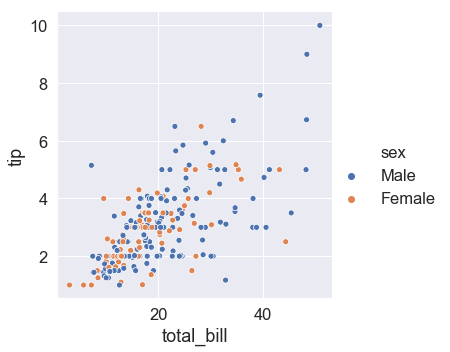

In [4]:
#hue:分组变量
sns.relplot(x = 'total_bill',y = 'tip',hue = 'sex',data = tips)

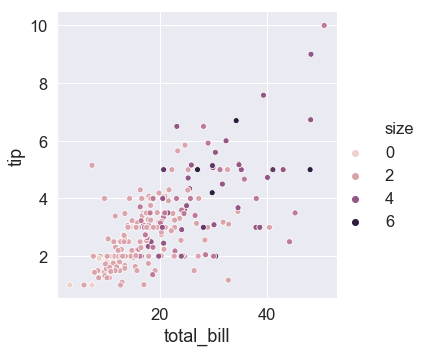

In [5]:
#hue为数值型的情况
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)


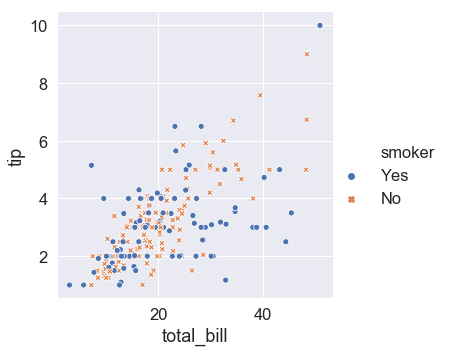

In [6]:
#style : 为每个类使用不同的标记样式
sns.relplot(x = 'total_bill',y = 'tip',hue = 'smoker',style = 'smoker',data = tips)

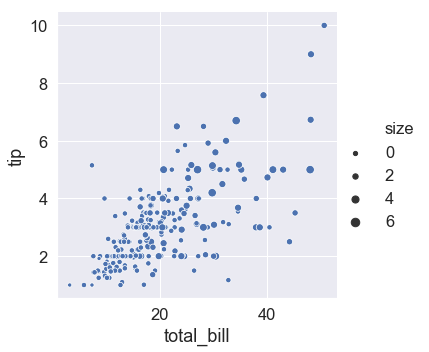

In [7]:
#size : 设置点的大小
sns.relplot(x="total_bill", y="tip", size="size", data=tips)

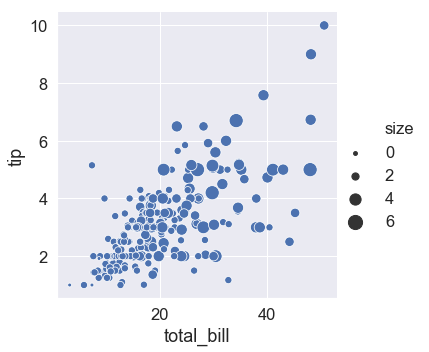

In [8]:
#sizes : 设置点大小的范围 
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips)

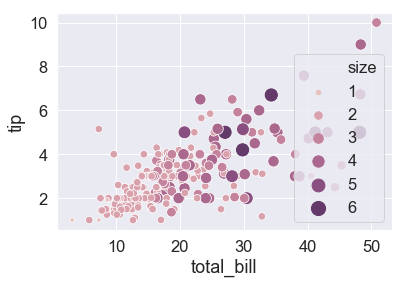

In [9]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="total_bill", y="tip",
                hue="size", size="size",
                sizes=(20, 200), palette=cmap,
                legend="full", data=tips)

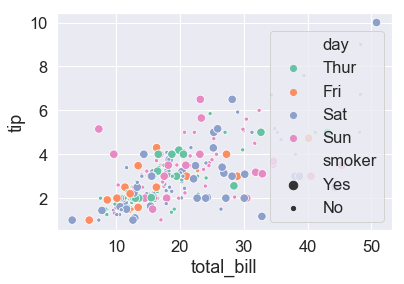

In [10]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="total_bill", y="tip",
                hue="day", size="smoker",
                palette="Set2",
                data=tips)

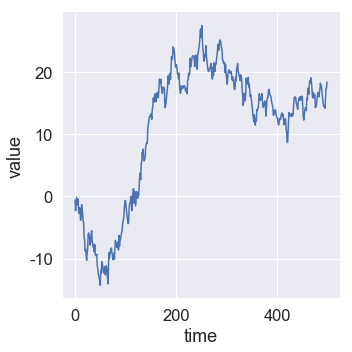

In [12]:
"""
sns.lineplot(
    ['x=None', 'y=None', 'hue=None', 'size=None', 'style=None', 
     'data=None', 'palette=None', 'hue_order=None', 'hue_norm=None', 
     'sizes=None', 'size_order=None', 'size_norm=None', 'dashes=True',
     'markers=None', 'style_order=None', 'units=None', "estimator='mean'", 
     'ci=95', 'n_boot=1000', 'sort=True', "err_style='band'", 'err_kws=None',
     "legend='brief'", 'ax=None', '**kwargs'],)
"""
#模拟数据
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)

In [15]:
"""
更复杂的数据集将对相同的x变量值有多个测量值。
seaborn中的默认行为是通过绘制平均值和平均值周围的95%置信区间
来聚合每个x值的多个度量值
"""
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


C:\Users\WinJX\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


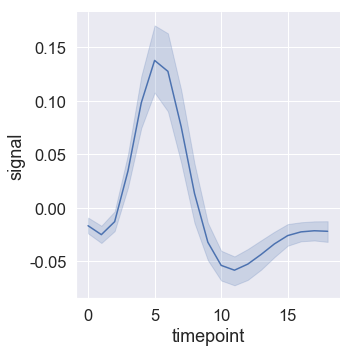

In [16]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)

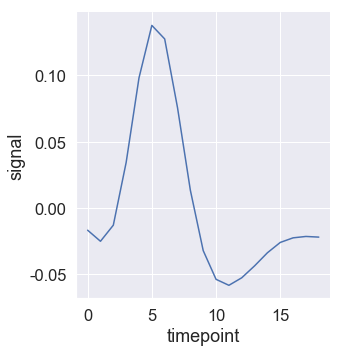

In [17]:
"""
ci = None
置信区间是使用bootstrapping计算的，对于较大的数据集，
它可能是时间密集型的。因此，有可能禁用它们
"""
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri)

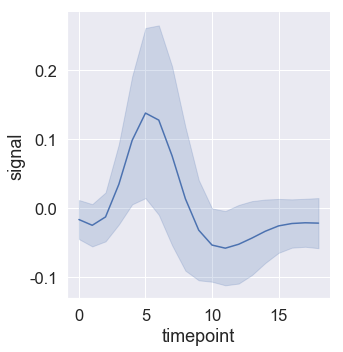

In [18]:
"""
另一个不错的选择，特别是对于较大的数据，
是通过绘制标准差而不是置信区间来表示分布在每个时间点的分布范围:
"""
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri)

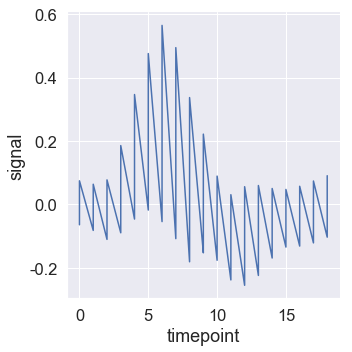

In [19]:
"""
要完全关闭聚合，将estimator参数设置为None。
当数据在每个点有多个观察值时，这可能会产生奇怪的效果。
"""
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri)

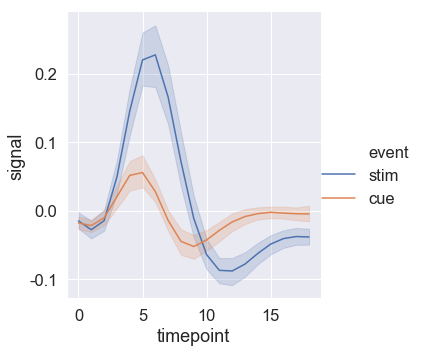

In [20]:
"""hue
添加一个具有两个级别的hue语义
，将图分割为两条线和错误带，每条线用不同的颜色表示它们对应的数据子集
"""
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

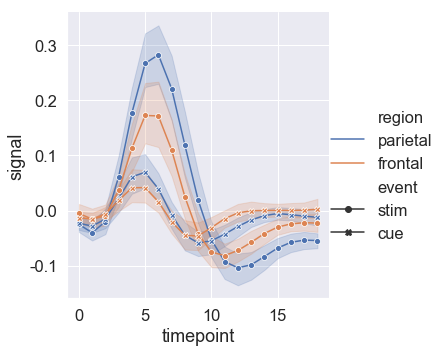

In [21]:
"""
多种标记和风格区分
"""
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri)

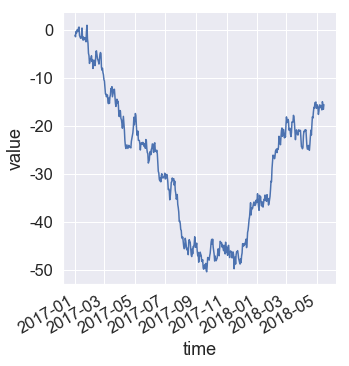

In [22]:
#绘制日期格式
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

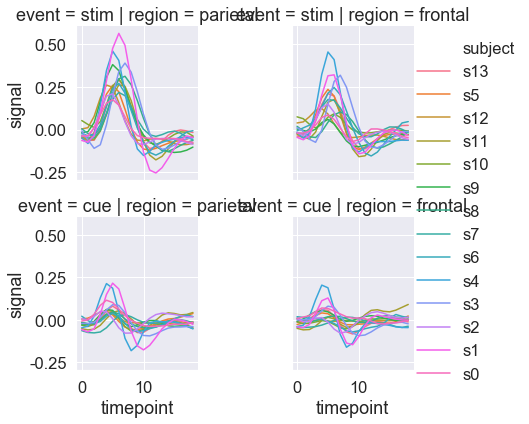

In [23]:
#多子图
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri)

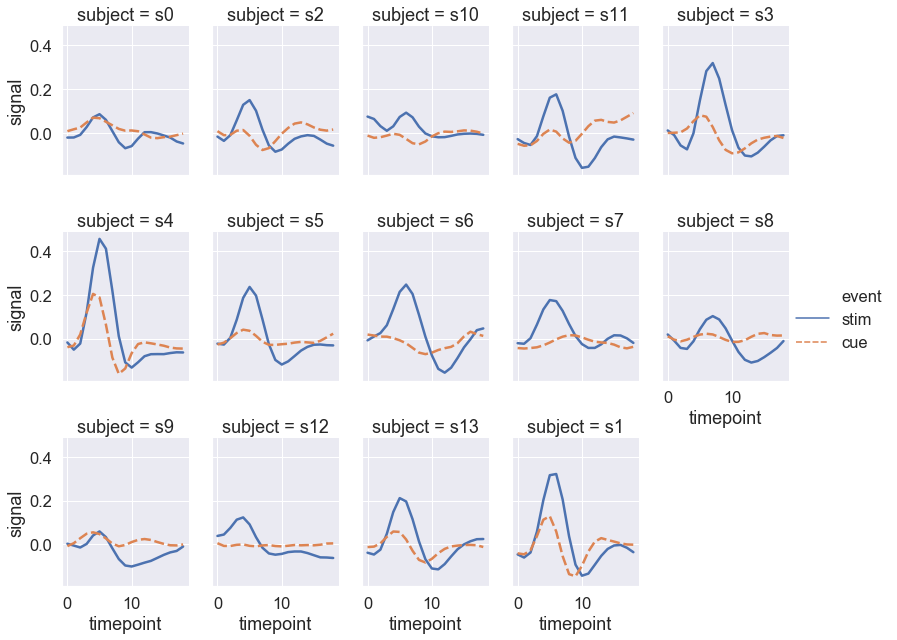

In [24]:
"""
检查一个变量的多个级别的效果时，在列上对该变量进行切面处理，
然后将切面“包装”到行中是一个好主意
"""
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))